# <span style="color:blue"> 02-1 데이터 집합 불러오기 </span>

## 갭마인더 데이터 집합 불러오기

In [1]:
import pandas

In [2]:
df = pandas.read_csv('../data/gapminder.tsv', sep='\t')

In [3]:
import pandas as pd
df = pd.read_csv('../data/gapminder.tsv', sep='\t')

## 불러온 데이터 집합 살펴보기

In [4]:
print(df.head())

       country continent  year  lifeExp       pop   gdpPercap
0  Afghanistan      Asia  1952   28.801   8425333  779.445314
1  Afghanistan      Asia  1957   30.332   9240934  820.853030
2  Afghanistan      Asia  1962   31.997  10267083  853.100710
3  Afghanistan      Asia  1967   34.020  11537966  836.197138
4  Afghanistan      Asia  1972   36.088  13079460  739.981106


In [5]:
print(type(df))

<class 'pandas.core.frame.DataFrame'>


In [6]:
print(df.shape)

(1704, 6)


In [7]:
print(df.columns)

Index(['country', 'continent', 'year', 'lifeExp', 'pop', 'gdpPercap'], dtype='object')


In [8]:
print(df.dtypes)

country       object
continent     object
year           int64
lifeExp      float64
pop            int64
gdpPercap    float64
dtype: object


In [9]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1704 entries, 0 to 1703
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   country    1704 non-null   object 
 1   continent  1704 non-null   object 
 2   year       1704 non-null   int64  
 3   lifeExp    1704 non-null   float64
 4   pop        1704 non-null   int64  
 5   gdpPercap  1704 non-null   float64
dtypes: float64(2), int64(2), object(2)
memory usage: 80.0+ KB
None


# <span style="color:blue"> 02-2 데이터 추출하기 </span>

## 열 단위로 데이터 추출하기

In [10]:
country_df = df['country']
print(type(country_df))

<class 'pandas.core.series.Series'>


In [11]:
print(country_df.head())

0    Afghanistan
1    Afghanistan
2    Afghanistan
3    Afghanistan
4    Afghanistan
Name: country, dtype: object


In [12]:
print(country_df.tail())

1699    Zimbabwe
1700    Zimbabwe
1701    Zimbabwe
1702    Zimbabwe
1703    Zimbabwe
Name: country, dtype: object


In [13]:
subset = df[['country', 'continent', 'year']]
print(type(subset))

<class 'pandas.core.frame.DataFrame'>


In [14]:
print(subset.head())

       country continent  year
0  Afghanistan      Asia  1952
1  Afghanistan      Asia  1957
2  Afghanistan      Asia  1962
3  Afghanistan      Asia  1967
4  Afghanistan      Asia  1972


In [15]:
print(subset.tail())

       country continent  year
1699  Zimbabwe    Africa  1987
1700  Zimbabwe    Africa  1992
1701  Zimbabwe    Africa  1997
1702  Zimbabwe    Africa  2002
1703  Zimbabwe    Africa  2007


## loc 속성으로 행 단위 데이터 추출하기

In [16]:
print(df.loc[0])

country      Afghanistan
continent           Asia
year                1952
lifeExp           28.801
pop              8425333
gdpPercap     779.445314
Name: 0, dtype: object


In [17]:
print(df.loc[99])

country      Bangladesh
continent          Asia
year               1967
lifeExp          43.453
pop            62821884
gdpPercap    721.186086
Name: 99, dtype: object


In [18]:
print(df.loc[-1])   # 오류 발생

KeyError: -1

In [19]:
number_of_rows = df.shape[0]
last_row_index = number_of_rows - 1
print(df.loc[last_row_index])

country        Zimbabwe
continent        Africa
year               2007
lifeExp          43.487
pop            12311143
gdpPercap    469.709298
Name: 1703, dtype: object


In [20]:
print(df.tail(n=1))

       country continent  year  lifeExp       pop   gdpPercap
1703  Zimbabwe    Africa  2007   43.487  12311143  469.709298


In [21]:
print(df.loc[[0, 99, 999]])

         country continent  year  lifeExp       pop    gdpPercap
0    Afghanistan      Asia  1952   28.801   8425333   779.445314
99    Bangladesh      Asia  1967   43.453  62821884   721.186086
999     Mongolia      Asia  1967   51.253   1149500  1226.041130


## 알아두면 좋아요! } tail 메서드와 loc 속성이 반환하는 자료형은 서로 달라요!

In [22]:
subset_loc = df.loc[0]
subset_tail = df.tail(n=1)

print(type(subset_loc))
print(type(subset_tail))

<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>


## iloc 속성으로 행 데이터 추출하기

In [23]:
print(df.iloc[1])

country      Afghanistan
continent           Asia
year                1957
lifeExp           30.332
pop              9240934
gdpPercap      820.85303
Name: 1, dtype: object


In [24]:
print(df.iloc[99])

country      Bangladesh
continent          Asia
year               1967
lifeExp          43.453
pop            62821884
gdpPercap    721.186086
Name: 99, dtype: object


In [25]:
print(df.iloc[-1])

country        Zimbabwe
continent        Africa
year               2007
lifeExp          43.487
pop            12311143
gdpPercap    469.709298
Name: 1703, dtype: object


In [26]:
print(df.iloc[1710])

IndexError: single positional indexer is out-of-bounds

In [27]:
print(df.iloc[[0, 99, 999]])

         country continent  year  lifeExp       pop    gdpPercap
0    Afghanistan      Asia  1952   28.801   8425333   779.445314
99    Bangladesh      Asia  1967   43.453  62821884   721.186086
999     Mongolia      Asia  1967   51.253   1149500  1226.041130


## 데이터 추출하기 - 슬라이싱 구문, range 메서드

### 1. 슬라이싱 구문으로 데이터 추출하기

In [28]:
subset = df.loc[:, ['year', 'pop']]
print(subset.head())

   year       pop
0  1952   8425333
1  1957   9240934
2  1962  10267083
3  1967  11537966
4  1972  13079460


In [29]:
subset = df.iloc[:, [2, 4, -1]]
print(subset.head())

   year       pop   gdpPercap
0  1952   8425333  779.445314
1  1957   9240934  820.853030
2  1962  10267083  853.100710
3  1967  11537966  836.197138
4  1972  13079460  739.981106


### 2. range 메서드로 데이터 추출하기

In [30]:
small_range = list(range(5))
print(small_range)

[0, 1, 2, 3, 4]


In [31]:
print(type(small_range))

<class 'list'>


In [32]:
subset = df.iloc[:, small_range]
print(subset.head())

       country continent  year  lifeExp       pop
0  Afghanistan      Asia  1952   28.801   8425333
1  Afghanistan      Asia  1957   30.332   9240934
2  Afghanistan      Asia  1962   31.997  10267083
3  Afghanistan      Asia  1967   34.020  11537966
4  Afghanistan      Asia  1972   36.088  13079460


In [33]:
small_range = list(range(3, 6))
print(small_range)

[3, 4, 5]


In [34]:
subset = df.iloc[:, small_range]
print(subset.head())

   lifeExp       pop   gdpPercap
0   28.801   8425333  779.445314
1   30.332   9240934  820.853030
2   31.997  10267083  853.100710
3   34.020  11537966  836.197138
4   36.088  13079460  739.981106


In [35]:
small_range = list(range(0, 6, 2))
subset = df.iloc[:, small_range]
print(subset.head())

       country  year       pop
0  Afghanistan  1952   8425333
1  Afghanistan  1957   9240934
2  Afghanistan  1962  10267083
3  Afghanistan  1967  11537966
4  Afghanistan  1972  13079460


### 4. 슬라이싱 구문과 range 메서드 비교하기

In [36]:
subset = df.iloc[:, :3]
print(subset.head())

       country continent  year
0  Afghanistan      Asia  1952
1  Afghanistan      Asia  1957
2  Afghanistan      Asia  1962
3  Afghanistan      Asia  1967
4  Afghanistan      Asia  1972


In [37]:
subset = df.iloc[:, 0:6:2]
print(subset.head())

       country  year       pop
0  Afghanistan  1952   8425333
1  Afghanistan  1957   9240934
2  Afghanistan  1962  10267083
3  Afghanistan  1967  11537966
4  Afghanistan  1972  13079460


### 6. loc, iloc 속성 자유자재로 사용하기

In [38]:
print(df.iloc[[0, 99, 999], [0, 3, 5]])

         country  lifeExp    gdpPercap
0    Afghanistan   28.801   779.445314
99    Bangladesh   43.453   721.186086
999     Mongolia   51.253  1226.041130


In [39]:
print(df.loc[[0, 99, 999], ['country', 'lifeExp', 'gdpPercap']])

         country  lifeExp    gdpPercap
0    Afghanistan   28.801   779.445314
99    Bangladesh   43.453   721.186086
999     Mongolia   51.253  1226.041130


In [40]:
print(df.loc[10:13, ['country', 'lifeExp', 'gdpPercap']])

        country  lifeExp    gdpPercap
10  Afghanistan   42.129   726.734055
11  Afghanistan   43.828   974.580338
12      Albania   55.230  1601.056136
13      Albania   59.280  1942.284244


# <span style="color:blue"> 02-3 기초적인 통계 계산하기 </span>

In [41]:
print(df.head(n=10))

       country continent  year  lifeExp       pop   gdpPercap
0  Afghanistan      Asia  1952   28.801   8425333  779.445314
1  Afghanistan      Asia  1957   30.332   9240934  820.853030
2  Afghanistan      Asia  1962   31.997  10267083  853.100710
3  Afghanistan      Asia  1967   34.020  11537966  836.197138
4  Afghanistan      Asia  1972   36.088  13079460  739.981106
5  Afghanistan      Asia  1977   38.438  14880372  786.113360
6  Afghanistan      Asia  1982   39.854  12881816  978.011439
7  Afghanistan      Asia  1987   40.822  13867957  852.395945
8  Afghanistan      Asia  1992   41.674  16317921  649.341395
9  Afghanistan      Asia  1997   41.763  22227415  635.341351


## 그룹화한 데이터의 평균 구하기

### 1. lifeExp 열을 연도별로 그룹화하여 평균 계산하기

In [42]:
print(df.groupby('year')['lifeExp'].mean())

year
1952    49.057620
1957    51.507401
1962    53.609249
1967    55.678290
1972    57.647386
1977    59.570157
1982    61.533197
1987    63.212613
1992    64.160338
1997    65.014676
2002    65.694923
2007    67.007423
Name: lifeExp, dtype: float64


In [43]:
grouped_year_df = df.groupby('year')
print(type(grouped_year_df))

<class 'pandas.core.groupby.generic.DataFrameGroupBy'>


In [44]:
print(grouped_year_df)

In [45]:
grouped_year_df_lifeExp = grouped_year_df['lifeExp']
print(type(grouped_year_df_lifeExp))

<class 'pandas.core.groupby.generic.SeriesGroupBy'>


In [46]:
mean_lifeExp_by_year = grouped_year_df_lifeExp.mean()
print(mean_lifeExp_by_year)

year
1952    49.057620
1957    51.507401
1962    53.609249
1967    55.678290
1972    57.647386
1977    59.570157
1982    61.533197
1987    63.212613
1992    64.160338
1997    65.014676
2002    65.694923
2007    67.007423
Name: lifeExp, dtype: float64


### 6. lifeExp, gdpPercap 열의 평균값을 연도, 지역별로 그룹화하여 한 번에 계산하기

In [47]:
multi_group_var = df.groupby(['year', 'continent'])[['lifeExp', 'gdpPercap']].mean()
print(multi_group_var)

                  lifeExp     gdpPercap
year continent                         
1952 Africa     39.135500   1252.572466
     Americas   53.279840   4079.062552
     Asia       46.314394   5195.484004
     Europe     64.408500   5661.057435
     Oceania    69.255000  10298.085650
1957 Africa     41.266346   1385.236062
     Americas   55.960280   4616.043733
     Asia       49.318544   5787.732940
     Europe     66.703067   6963.012816
     Oceania    70.295000  11598.522455
1962 Africa     43.319442   1598.078825
     Americas   58.398760   4901.541870
     Asia       51.563223   5729.369625
     Europe     68.539233   8365.486814
     Oceania    71.085000  12696.452430
1967 Africa     45.334538   2050.363801
     Americas   60.410920   5668.253496
     Asia       54.663640   5971.173374
     Europe     69.737600  10143.823757
     Oceania    71.310000  14495.021790
1972 Africa     47.450942   2339.615674
     Americas   62.394920   6491.334139
     Asia       57.319269   8187.468699


In [48]:
print(type(multi_group_var))

<class 'pandas.core.frame.DataFrame'>


### 7. 그룹화한 데이터 개수 세기

In [49]:
print(df.groupby('continent')['country'].nunique())

continent
Africa      52
Americas    25
Asia        33
Europe      30
Oceania      2
Name: country, dtype: int64


# <span style="color:blue"> 02-4 그래프 그리기 </span>

## 그래프 그리기

In [50]:
%matplotlib inline
import matplotlib.pyplot as plt

In [51]:
global_yearly_life_expectancy = df.groupby('year')['lifeExp'].mean()
print(global_yearly_life_expectancy)

year
1952    49.057620
1957    51.507401
1962    53.609249
1967    55.678290
1972    57.647386
1977    59.570157
1982    61.533197
1987    63.212613
1992    64.160338
1997    65.014676
2002    65.694923
2007    67.007423
Name: lifeExp, dtype: float64


<Axes: xlabel='year'>

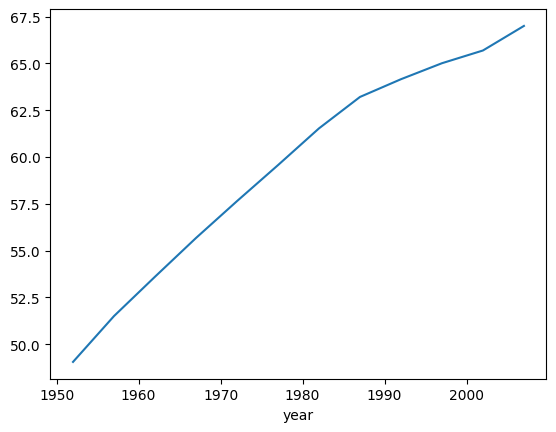

In [52]:
global_yearly_life_expectancy.plot()